In [1]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3641, done.
remote: Total 3641 (delta 0), reused 0 (delta 0), pack-reused 3641 (from 1)
Receiving objects: 100% (3641/3641), 632.96 MiB | 10.22 MiB/s, done.
Resolving deltas: 100% (1450/1450), done.
Updating files: 100% (1174/1174), done.


In [1]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import cv2

In [5]:
df = pd.read_csv('./covid-chestxray-dataset/metadata.csv')

In [6]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [9]:
df.view.unique()

array(['PA', 'AP', 'L', 'Axial', 'AP Supine', 'Coronal', 'AP Erect'],
      dtype=object)

**In X-ray imaging,**
- "AP" refers to anteroposterior (front-to-back) views
- "PA" refers to posteroanterior (back-to-front) views

In [12]:
df.finding.unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus', 'No Finding',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'todo', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

In [13]:
covid_df = df[df.finding=="Pneumonia/Viral/COVID-19"]
covid_df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [14]:
covid_df = covid_df[(covid_df.view == "AP") | (covid_df.view == "PA")]

In [15]:
covid_df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [16]:
images = covid_df.filename.values.tolist()
print(images)

['auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'nejmc2001573_f1a.jpeg', 'nejmc2001573_f1b.jpeg', 'lancet-case2a.jpg', 'lancet-case2b.jpg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', 'nCoV-radiol.2020200269.fig1-day7.jpeg', 'nejmoa2001191_f1-PA.jpeg', 'nejmoa2001191_f3-PA.jpeg', 'nejmoa2001191_f4.jpeg', 'nejmoa2001191_f5-PA.jpeg', 'ryct.2020200034.fig2.jpeg', 'ryct.2020200034.fig5-day0.jpeg', 'ryct.2020200034.fig5-day4.jpeg', 'ryct.2020200034.fig5-day7.jpeg', 'ryct.2020200028.fig1a.jpeg', 'jkms-35-e79-g001-l-a.jpg', 'jkms-35-e79-g001-l-b.jpg', 'jkms-35-e79-g001-l-c.jpg', 'radiol.2020200490.fig3.jpeg', '1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '1-s2.0-S0929664620300449-gr2_lrg-b.jpg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg', '1-s2.0-S0929664620

In [29]:
n_covid_xrays =len(images)
print(n_covid_xrays)

342


In [3]:
covid_path='./covid-data/train/covid19'
normal_path='./covid-data/train/normal'

In [26]:
os.makedirs(covid_path)
os.makedirs(normal_path)

In [28]:
for image in images:
    shutil.copy(os.path.join('./covid-chestxray-dataset/images', image), os.path.join(covid_path, image))

In [31]:
for image in os.listdir('./chest_xray/train/NORMAL')[:n_covid_xrays]:
    shutil.copy(os.path.join('./chest_xray/train/NORMAL', image), os.path.join(normal_path, image))

In [32]:
dataset = './covid-data/train'

In [37]:
class_names = os.listdir(dataset)
class_names.remove('.DS_Store')
print(class_names)

['covid19', 'normal']


In [38]:
image_count = {}
for i in class_names:
    image_count[i] = len(os.listdir(os.path.join(dataset,i)))

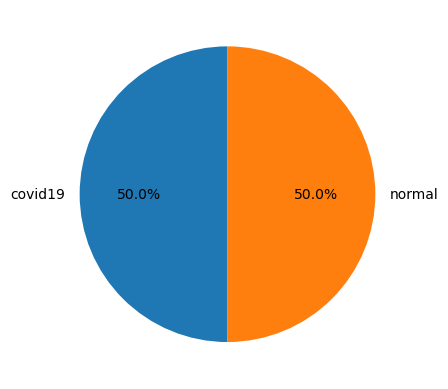

In [45]:
#Plotting Distribution of Each Classes
fig1, ax1 = plt.subplots()
ax1.pie(image_count.values(),
        labels = image_count.keys(),
        autopct = '%1.1f%%',
        startangle=90)
plt.show()

/var/folders/pc/m9f47_z135vbtrmrpff_1vmw0000gn/T/ipykernel_28254/1775229668.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


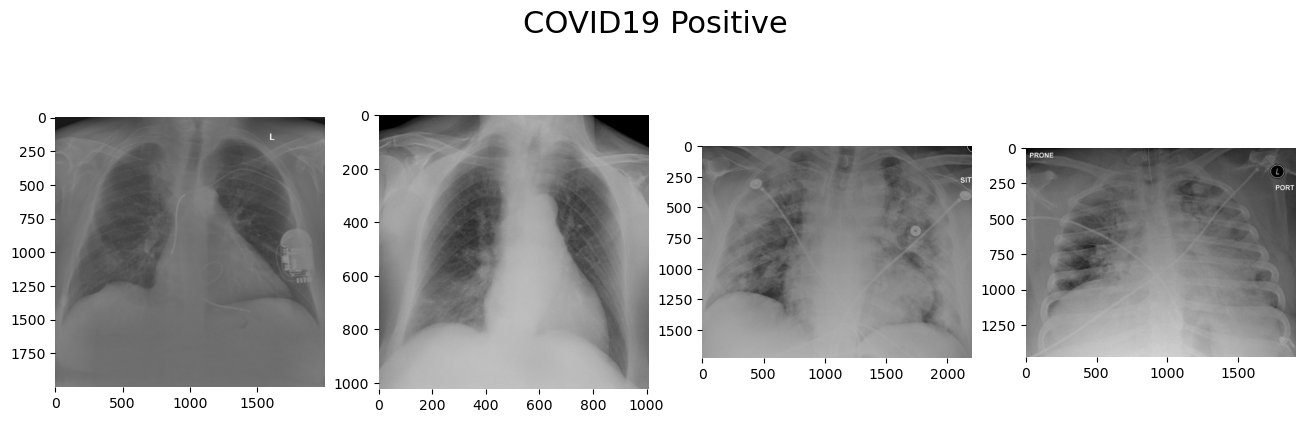

In [6]:
fig = plt.figure(figsize=(16,5))
fig.suptitle("COVID19 Positive", size=22)
img_paths = os.listdir(covid_path)

for i,image in enumerate(img_paths[:4]):
    img = cv2.imread(os.path.join(covid_path, image))
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img)
fig.show()

/var/folders/pc/m9f47_z135vbtrmrpff_1vmw0000gn/T/ipykernel_28254/531600331.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


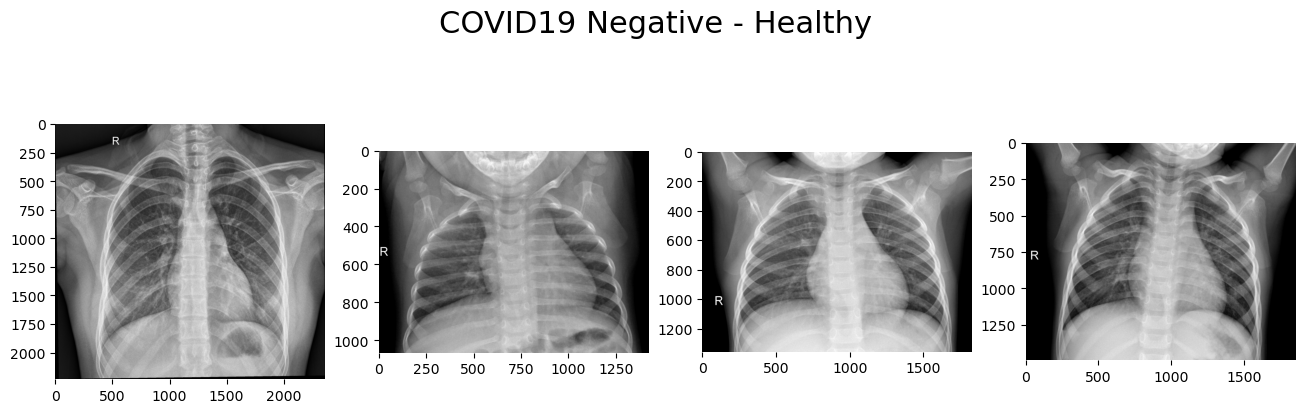

In [7]:
fig = plt.figure(figsize=(16,5))
fig.suptitle("COVID19 Negative - Healthy", size=22)
img_paths = os.listdir(normal_path)

for i,image in enumerate(img_paths[:4]):
    img = cv2.imread(os.path.join(normal_path, image))
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img)
fig.show()

### Model EValuation Dataset

In [8]:
covid_test_path='./covid-data/test/covid19'
normal_test_path='./covid-data/test/normal'

In [9]:
os.makedirs(covid_test_path)
os.makedirs(normal_test_path)

In [10]:
for image in os.listdir('./COVID-19_Radiography_Dataset/COVID/images')[:100]:
    shutil.copy(os.path.join('./COVID-19_Radiography_Dataset/COVID/images', image), os.path.join(covid_test_path, image))

In [17]:
for image in os.listdir('./COVID-19_Radiography_Dataset/Normal/images')[:100]:
    shutil.copy(os.path.join('./COVID-19_Radiography_Dataset/Normal/images', image), os.path.join(normal_test_path, image))